# Homework 3: Logistics Regression
Implement everywhere that has an ellipsis (`...`).

In [540]:
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [541]:
from sklearn.datasets import load_iris
data = load_iris()
X, Y = data.data, data.target

##### class 1, class cũ sẽ tương ứng là class 0, class 1 mới

In [542]:
# only classify class 1 vs. class 2
X_data = X[Y >= 1, :]
y_data = Y[Y >= 1] - 1

### Data normalization
Remember: normalization is done per feature, not all at once. Also, remember that Y is [1, 2] instead of [0, 1].

In [543]:
# Write your code here. Don't forget the bias!
def normalization_z1_score(X):
    u = []
    o = []
    for j in range(X.shape[1]):
        u.append(np.mean(X[:,j]))
        o.append(np.std(X[:,j]))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X[i][j] = (X[i][j] - u[j])/o[j]
    return X

In [560]:
def normalization_min_max_scaling(X):
    maxx = []
    minn = []
    for j in range(X.shape[1]):
        maxx.append(np.max(X[:,j]))
        minn.append(np.min(X[:,j]))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X[i][j] = (X[i][j] - minn[j])/(maxx[j] - minn[j])
    return X

### Define classification model
Create parameters here. Initialize with zeros. In case you forgot: $Y = \sigma(X\Theta)$.

In [545]:
def init(X_data):
    weight = np.zeros(X_data.shape[1] + 1)
    X_data = np.insert(X_data,0,np.ones(X_data.shape[0]),axis = 1)
    return weight,X_data

### Define evaluation metrics

In [546]:
from sklearn.metrics import accuracy_score,classification_report


def accuracy(X, Y, weight):
    '''
    Evaluate the model, represented by `weight`, with data (X, Y).
    
    Input:
        X:      data features
        Y:      data labels
        weight: model weights
    Ouput:
        Model accuracy on input data.
    '''
    
    # implement your code here
    y_pred = (1/(1 + np.exp(-np.dot(X, weight)))) > 0.5
    y_pred = y_pred.astype(int) 
    print("Accuracy score: %f" % accuracy_score(Y,y_pred))
    print(classification_report(Y, y_pred))

### Hyperparameters

In [547]:
# learning rate
alpha = 0.01
# epochs
epoch = 10000

### Binary cross entropy loss

In [548]:
def binany_cross_entropy(y_data, y_pred):
    J = -np.mean(y_data*np.log(y_pred) + (1-y_data)*np.log(1-y_pred))
    return J

### Train the model.

In [549]:
# your code here
def train_model(X_data, y_data, weight, alpha = 0.01, epoch = 10000):
    loss = []
    for i in range(epoch):
        y_pred = 1/(1 + np.exp(-np.dot(X_data, weight)))
        weight = weight - (alpha/(X_data.shape[0])) * np.dot(X_data.T, (y_pred - y_data))
        loss.append(binany_cross_entropy(y_data,y_pred))
    return weight,loss

In [550]:
#normalization z1_score
X_train = normalization_z1_score(X_data)

#init
weight,X_train = init(X_train)

#train
weight,loss_history = train_model(X_train,y_data,weight,alpha = alpha,epoch = epoch)
weight

array([ 0.12047504, -0.44156746, -0.89309501,  2.965364  ,  3.3427994 ])

In [551]:
# just to double check
assert np.allclose(weight, np.array([0.12047504, -0.44156746, -0.89309501, 2.965364, 3.3427994]))

In [552]:
# model accuracy
accuracy(X_train, y_data, weight)

Accuracy score: 0.960000
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.94      0.98      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [553]:
def plot(loss):  
    plt.figure(figsize=(10, 6))
    plt.plot(loss, label='Loss History', alpha=0.5)
    plt.legend()
    plt.show()

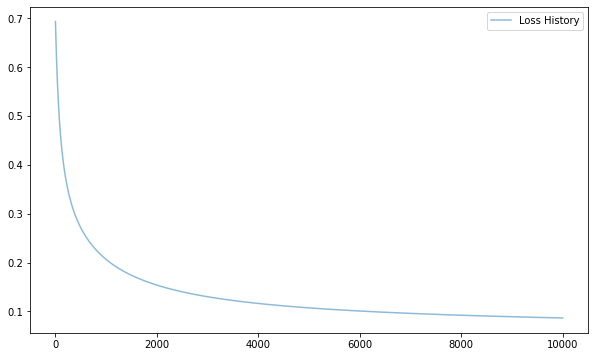

In [554]:
plot(loss_history)

### (Optional) How low can you go?
Do anything you want to get the best performance out of the training set. For once, let's overfit to your heart's content.

In [555]:
# do some fun code here and try to match this :)
...

### No normalization, learning rate = 3, epoch = 10000

Weights: [-0.35439035 -1.62584135 -2.21192533  7.74566651  7.72842953]
Loss: 5.949273395683964
Accuracy score: 0.980000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



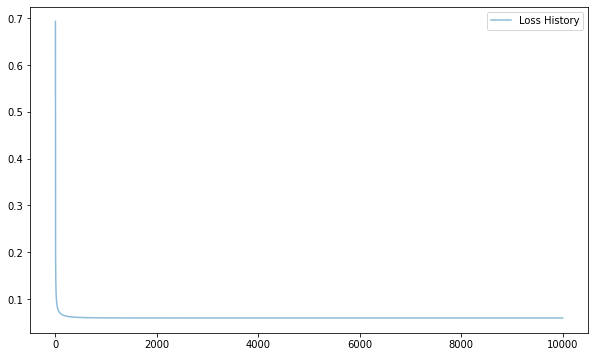

In [585]:
weight,X_train = init(X_data)
weight,loss_history = train_model(X_train,y_data,weight,alpha = 3,epoch = 10000)

print('Weights:', weight)
y = 1 / (1 + np.exp(-X_train @ weight))
loss = -np.sum(y_data * np.log(y) + (1 - y_data) * np.log(1 - y))
print('Loss:', loss)
accuracy(X_train, y_data, weight)
plot(loss_history)

### Feature Normalization - Min-max scaling, learning rate = 3, epoch = 10000

Weights: [-16.86044808  -6.26008271  -9.76063009  28.89518872  22.43131853]
Loss: 6.083551331687144
Accuracy score: 0.980000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



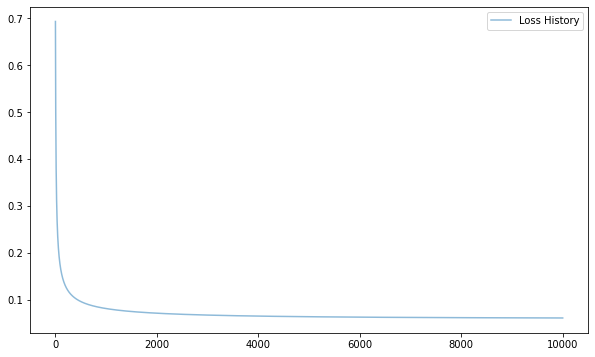

In [567]:
X_train = normalization_min_max_scaling(X_data)
weight,X_train = init(X_train)
weight,loss_history = train_model(X_train,y_data,weight,alpha = 3,epoch = 10000)

print('Weights:', weight)
y = 1 / (1 + np.exp(-X_train @ weight))
loss = -np.sum(y_data * np.log(y) + (1 - y_data) * np.log(1 - y))
print('Loss:', loss)
accuracy(X_train, y_data, weight)
plot(loss_history)

### Feature Normalization z1-score, learning rate = 3, epoch = 10000

Weights: [-0.35439035 -1.62584135 -2.21192533  7.74566651  7.72842953]
Loss: 5.949273395683964
Accuracy score: 0.980000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



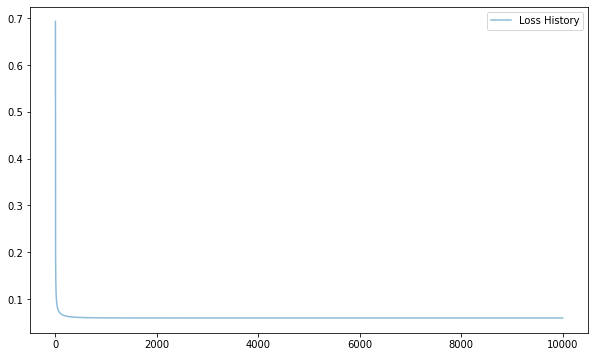

In [583]:
X_train = normalization_z1_score(X_data)
weight,X_train = init(X_train)
weight,loss_history = train_model(X_train,y_data,weight,alpha = 3,epoch = 10000)

print('Weights:', weight)
y = 1 / (1 + np.exp(-X_train @ weight))
loss = -np.sum(y_data * np.log(y) + (1 - y_data) * np.log(1 - y))
print('Loss:', loss)
accuracy(X_train, y_data, weight)
plot(loss_history)

### Feature Normalization z1-score, learning rate = 3, epoch = 10000, GD with momentum = 0.1

In [581]:
# your code here
def train_model_GD_momentum(X_data, y_data, weight, alpha = 0.01, epoch = 10000,momentum = 0.1):
    loss = []
    weight_old = np.zeros(X_data.shape[1])
    for i in range(epoch):
        y_pred = 1/(1 + np.exp(-np.dot(X_data, weight)))
        weight = weight - momentum*weight_old - (alpha/(X_data.shape[0])) * np.dot(X_data.T, (y_pred - y_data))
        weight_old = weight
        loss.append(binany_cross_entropy(y_data,y_pred))
    return weight,loss

Weights: [-0.12075756 -1.27881875 -1.48152014  5.45618645  5.30304614]
Loss: 6.3066694111257275
Accuracy score: 0.980000
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



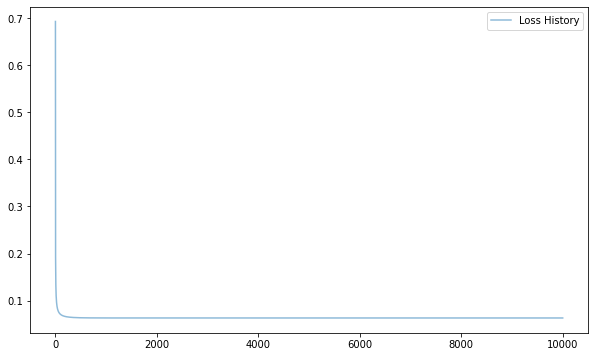

In [582]:
X_train = normalization_z1_score(X_data)
weight,X_train = init(X_train)
weight,loss_history = train_model_GD_momentum(X_train,y_data,weight,alpha = 3,epoch = 10000,momentum = 0.001)

print('Weights:', weight)
y = 1 / (1 + np.exp(-X_train @ weight))
loss = -np.sum(y_data * np.log(y) + (1 - y_data) * np.log(1 - y))
print('Loss:', loss)
accuracy(X_train, y_data, weight)
plot(loss_history)

# KẾT LUẬN 

- Lúc đầu acc đạt 96% là do leanrning rate thấp, cải thiện bằng tăng leanrning cao lên hoặc tăng số epoch lên 
- Sử dụng feature nomalization với bài này không ảnh hưởng quá nhiều tới kết quả cuối 
- Gradient Descent với momentum khiến hàm loss cao hơn (có thể là do chưa chọn learning rate với momentum phù hợp)
- Hàm loss từ epoch tầm khoảng 1000 bắt đầu đi ngang => có thể đoán đã đạt cực tiểu (hoặc rơi vào cực tiểu địa phương) 